In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


In [9]:
X = pd.read_csv(r"C:\Users\Arvind\Downloads\archive (1)\segmentation data.csv",encoding='latin1')
X = X.drop('ID', axis = 1)
X.fillna(method ='ffill', inplace = True)
print(X.head())
X['Income'] = X['Income'].astype(float)

   Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1


In [10]:
X.dtypes

Sex                  int64
Marital status       int64
Age                  int64
Education            int64
Income             float64
Occupation           int64
Settlement size      int64
dtype: object

In [14]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

C:\Users\Arvind\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arvind\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0  0.667958  0.193198
1 -0.220285  0.769376
2  0.231485 -0.831913
3  0.917156  0.079669
4  0.901973 -0.031108


In [38]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.0005, min_samples = 3).fit(X_principal)
labels = db_default.labels_
print(labels)
X.columns = X.columns.str.strip()

[-1 -1 -1 ... -1 -1 -1]


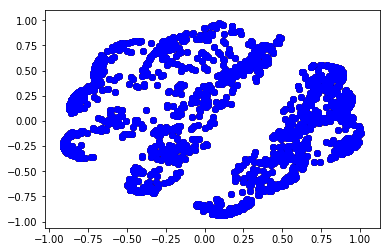

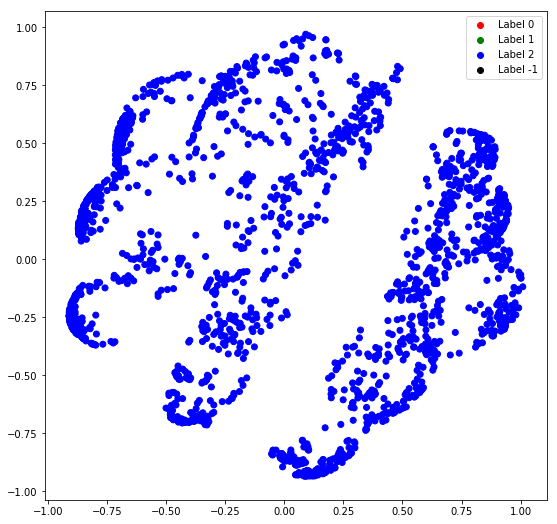

In [39]:
colours = {}
colours[0] = 'g'
colours[1] = 'r'
colours[2] = 'k'
colours[-1] = 'b'
  
cvec = [colours[label] for label in labels]
  
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
  
# Building the legend
plt.legend((g, r, k, b), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

In [40]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal)
labels1 = db.labels_
print(labels1)

[-1 -1 -1 ... -1  0 -1]


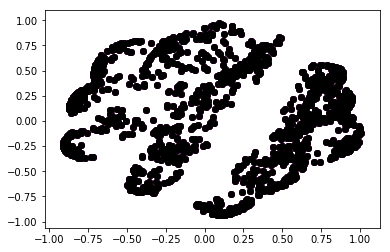

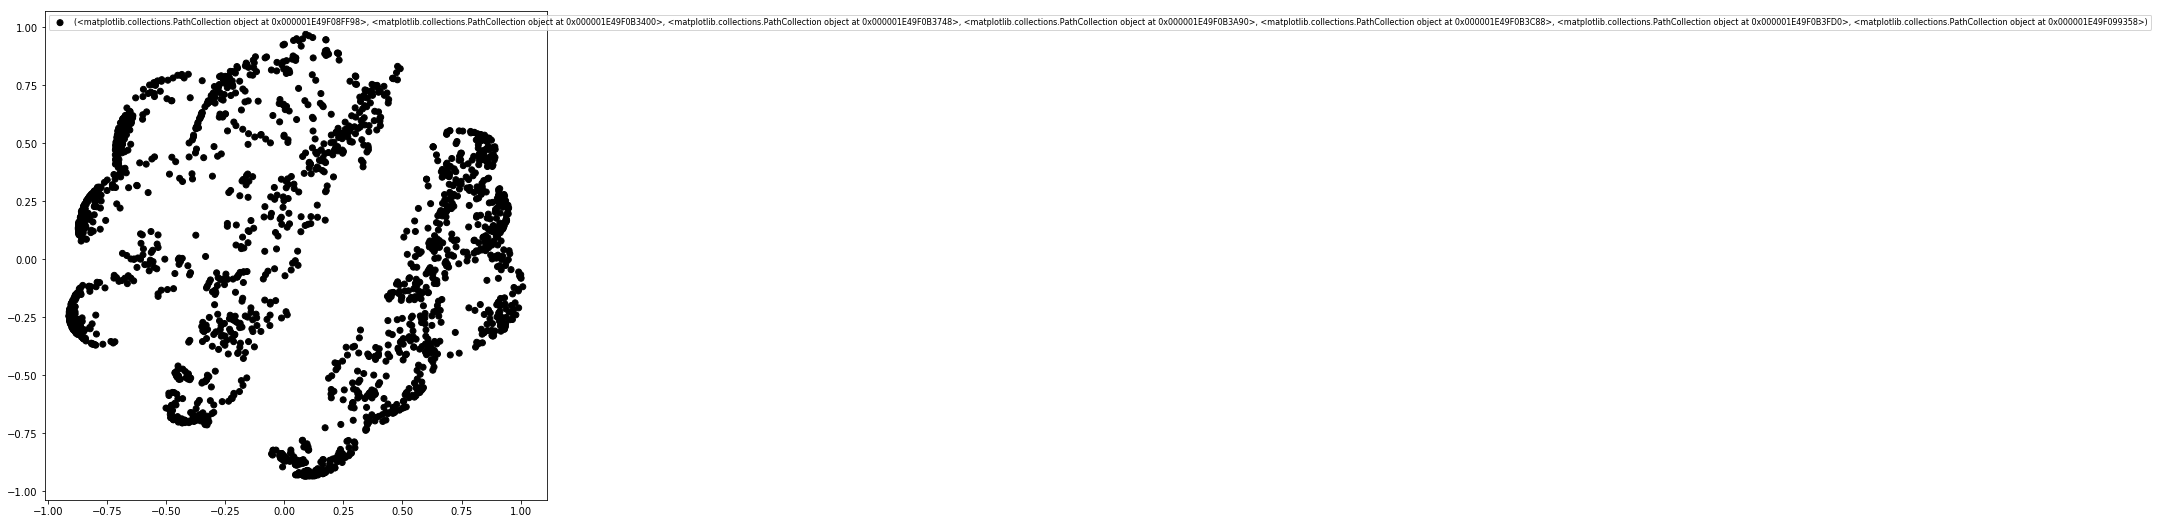

In [41]:
colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]
  
r = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0])
g = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1])
b = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2])
c = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3])
y = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4])
m = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5])
k = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6])
  
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend(((r, g, b, c, y, m, k),
           'Label 0', 'Label 1', 'Label 2', 'Label 3','Label 4',
            'Label 5', 'Label -1'),
           scatterpoints = 1,
           loc ='upper left',
           ncol = 3,
           fontsize = 8)
plt.show()